#Task 3: Advanced Analytics using PySpark
By Abdulwahab Adeshina Abdulliameed \
Task 3.1) Analyze and Interpret Big Data
`In this note, we will Analyze and Interpret Big Data using PySpark.`


**Setting Up PySpark in Colab**

In [1]:
#Update system packages
!sudo apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:12 https://cloud.r-project.org/bin/linux/u

In [2]:
#install Java
!sudo apt install default-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  default-jdk-headless openjdk-11-jdk openjdk-11-jdk-headless openjdk-11-jre
  openjdk-11-jre-headless
Suggested packages:
  openjdk-11-demo openjdk-11-source visualvm libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic
Recommended packages:
  libatk-wrapper-java-jni fonts-dejavu-extra
The following NEW packages will be installed:
  default-jdk default-jdk-headless openjdk-11-jdk
The following packages will be upgraded:
  openjdk-11-jdk-headless openjdk-11-jre openjdk-11-jre-headless
3 upgraded, 3 newly installed, 0 to remove and 79 not upgraded.
Need to get 260 MB of archives.
After this operation, 1,610 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 openjdk-11-jre amd64 11.0.14.1+1-0ubuntu1~18.04 [174 kB]

In [3]:
# Download Apache Spark and extract
!wget https://archive.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
!tar xvf spark-3.0.3-bin-hadoop2.7.tgz

--2022-04-02 11:40:25--  https://archive.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220400553 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.3-bin-hadoop2.7.tgz’

spark-3.0.3-bin-had 100%[===================>] 210.19M  28.0MB/s    in 8.2s    

2022-04-02 11:40:34 (25.6 MB/s) - ‘spark-3.0.3-bin-hadoop2.7.tgz’ saved [220400553/220400553]

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.

In [4]:
#Install pyspark
!pip install -q findspark
!pip install pyspark

     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 46.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=44ea0932ee215b15cab624cadeb23dbe505e0457be3a6636ce498d940962aa53
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [5]:
#setting the environment path 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

In [6]:
#Running a local SparkSession
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [7]:
# Check the pyspark version
import pyspark
print(pyspark.__version__)

3.0.3


In [8]:
#Pyspark shell
spark

In [9]:
#Running a local SparkSession
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder\
.master("local")\
.appName("Colab")\
.config('spark.ui.port', '4050')\
.getOrCreate()

In [10]:
from pyspark.sql import SparkSession
# Numerical analysis package
import numpy as np
# Package to work with data
import pandas as pd
# Package for Matplotlib Pyplot
# Pyplot is a collection of functions in the popular visualization package Matplotlib.
import matplotlib as mpl
import matplotlib.pyplot as plt
# Package for Seaborn
# Seaborn is a Python data visualization library built on top of Matplotlib.
import seaborn as sns
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.stat import Correlation
import json
import pyspark.sql.functions as F
import pyspark.sql
from pyspark.sql.functions import col, skewness, kurtosis
from pyspark.context import SparkContext
from pyspark.sql.functions import * 
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import when
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.functions import from_unixtime, unix_timestamp
from pyspark.sql.types import StringType
from datetime import date, timedelta, datetime
import time

**Connect/Mount Google Drive to Colab**

In [11]:
#Connect/Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Define the UNSW-NB15 Dataframe**

In [12]:
#Define the UNSW-NB15 Dataframe
UNSWNB15 = spark.read.csv('/content/drive/MyDrive/UEL-UNICAF/Module 3: Big Data Analytics/Assessment/UNSW-NB15.csv', inferSchema=True )

In [13]:
#Rename the Columns Header
UNSWNB15 = UNSWNB15.withColumnRenamed('_c0','srcip') \
.withColumnRenamed('_c1','sport') \
.withColumnRenamed('_c2','dstip') \
.withColumnRenamed('_c3','dsport') \
.withColumnRenamed('_c4','proto') \
.withColumnRenamed('_c5','state') \
.withColumnRenamed('_c6','dur') \
.withColumnRenamed('_c7','sbytes') \
.withColumnRenamed('_c8','dbytes') \
.withColumnRenamed('_c9','sttl') \
.withColumnRenamed('_c10','dttl') \
.withColumnRenamed('_c11','sloss') \
.withColumnRenamed('_c12','dloss') \
.withColumnRenamed('_c13','service') \
.withColumnRenamed('_c14','Sload') \
.withColumnRenamed('_c15','Dload') \
.withColumnRenamed('_c16','Spkts') \
.withColumnRenamed('_c17','Dpkts') \
.withColumnRenamed('_c18','swin') \
.withColumnRenamed('_c19','dwin') \
.withColumnRenamed('_c20','stcpb') \
.withColumnRenamed('_c21','dtcpb') \
.withColumnRenamed('_c22','smeansz') \
.withColumnRenamed('_c23','dmeansz') \
.withColumnRenamed('_c24','trans_depth') \
.withColumnRenamed('_c25','res_bdy_len') \
.withColumnRenamed('_c26','Sjit') \
.withColumnRenamed('_c27','Djit') \
.withColumnRenamed('_c28','Stime') \
.withColumnRenamed('_c29','Ltime') \
.withColumnRenamed('_c30','Spkt') \
.withColumnRenamed('_c31','Dpkt') \
.withColumnRenamed('_c32','tcprtt') \
.withColumnRenamed('_c33','synack') \
.withColumnRenamed('_c34','ackdat') \
.withColumnRenamed('_c35','is_sm_ips_ports') \
.withColumnRenamed('_c36','ct_state_ttl') \
.withColumnRenamed('_c37','ct_flw_http_mthd') \
.withColumnRenamed('_c38','is_ftp_login') \
.withColumnRenamed('_c39','ct_ftp_cmd') \
.withColumnRenamed('_c40','ct_srv_src') \
.withColumnRenamed('_c41','ct_srv_dst') \
.withColumnRenamed('_c42','ct_dst_ltm') \
.withColumnRenamed('_c43','ct_src_ ltm') \
.withColumnRenamed('_c44','ct_src_dport_ltm') \
.withColumnRenamed('_c45','ct_dst_sport_ltm') \
.withColumnRenamed('_c46','ct_dst_src_ltm') \
.withColumnRenamed('_c47','attack_cat') \
.withColumnRenamed('_c48','Label') \

**Working with PySpark**

In [14]:
#Show Columns
UNSWNB15.columns

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Spkt',
 'Dpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [15]:
#Display Schema
UNSWNB15.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- S

In [ ]:
#Count all records/rows
UNSWNB15.count()

2539739

In [ ]:
#Show Dataframe UNSWNB15
UNSWNB15.show()

+----------+-----+-------------+------+-----+-----+------------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+----------+---------+----------+----------+------------+------------+------------+------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+-----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|state|         dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|    Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|      Sjit|     Djit|     Stime|     Ltime|        Spkt|        Dpkt|      tcprtt|      synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|L

**Descriptive Statistics**

In [ ]:
#Describe/Summary Statistics of UNSWNB15 Dataframe
UNSWNB15.describe().show()

+-------+-----------+------------------+-----------+------------------+-------+-------+------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+-------+--------------------+-----------------+-----------------+------------------+------------------+------------------+--------------------+--------------------+------------------+------------------+-------------------+------------------+------------------+------------------+--------------------+--------------------+------------------+-----------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+----------+-------------------+
|summary|      srcip|             sport|      dstip|            dsport|  proto|  state|             

In [ ]:
# Descriptive/Summary statistics of the 4 columns (numeric column)
# sbytes - Source bytes, 
# dbytes - Destination bytes,
# Spkts - Source Packets and 
# Dpkts - Destination Packets
UNSWNB15.describe('sbytes', 'dbytes', 'Spkts','Dpkts').show()

+-------+-----------------+------------------+-----------------+------------------+
|summary|           sbytes|            dbytes|            Spkts|             Dpkts|
+-------+-----------------+------------------+-----------------+------------------+
|  count|          2539739|           2539739|          2539739|           2539739|
|   mean|4340.072263330996| 36432.01132478574| 33.2925678583508|42.731821655689814|
| stddev|56409.39812286232|161105.30400824756|76.28775585678378|121.50842004704197|
|    min|                0|                 0|                0|                 0|
|    max|         14355774|          14657531|            10646|             11018|
+-------+-----------------+------------------+-----------------+------------------+



**Correlation**

In [16]:
#Correlation of sbytes and dbytes column.
UNSWNB15.stat.corr('sbytes','dbytes')

0.04702553278490288

In [ ]:
#Register the DataFrame as a temporary table in the SQLContext.
UNSWNB15.registerTempTable("UNSWNB15")

In [ ]:
spark.sql("select srcip, sport, sbytes, Spkts, service from UNSWNB15").show()

+----------+-----+------+-----+--------+
|     srcip|sport|sbytes|Spkts| service|
+----------+-----+------+-----+--------+
|59.166.0.3|56716|  7812|  122|       -|
|59.166.0.0|43467|  4238|   72|       -|
|59.166.0.5|41289|  2750|   44|       -|
|59.166.0.9|43785| 10476|  180|       -|
|59.166.0.8|40691| 13350|  232|       -|
|59.166.0.3|20393|  1958|   22|       -|
|59.166.0.7|19792|   146|    2|     dns|
|59.166.0.3|14382|   424|    8|ftp-data|
|59.166.0.9|37074|   146|    2|     dns|
|59.166.0.7|12569|   146|    2|     dns|
|59.166.0.1|12792|   146|    2|     dns|
|59.166.0.0|63414|  8928|   14|ftp-data|
|59.166.0.1|33555|  1540|   16|       -|
|59.166.0.8|10867|   568|    4|       -|
|59.166.0.8|12411|   512|    4|       -|
|59.166.0.8|46725|   146|    2|     dns|
|59.166.0.1|51562|   146|    2|     dns|
|59.166.0.3|48838|   146|    2|     dns|
|59.166.0.0|16907|  2934|   52|     ftp|
|59.166.0.0| 1915|  2854|   46|       -|
+----------+-----+------+-----+--------+
only showing top

In [ ]:
spark.sql("select COUNT(DISTINCT srcip) AS SRCIP from UNSWNB15").show()

+-----+
|SRCIP|
+-----+
|   43|
+-----+



In [ ]:
spark.sql ("SELECT srcip AS SourceIP, COUNT(label) AS Numberofconnections FROM UNSWNB15 GROUP BY srcip ORDER BY Numberofconnections DESC ").show()

+--------------+-------------------+
|      SourceIP|Numberofconnections|
+--------------+-------------------+
|    59.166.0.4|             197959|
|    59.166.0.1|             197680|
|    59.166.0.5|             197626|
|    59.166.0.2|             197550|
|    59.166.0.0|             197528|
|    59.166.0.3|             195953|
|    59.166.0.9|             190187|
|    59.166.0.6|             189419|
|    59.166.0.8|             189341|
|    59.166.0.7|             189059|
|  175.45.176.1|             127995|
|  175.45.176.3|             118670|
|  175.45.176.0|              82999|
|149.171.126.18|              81680|
|149.171.126.15|              44883|
|149.171.126.14|              41047|
|  175.45.176.2|              32026|
|149.171.126.10|              30365|
|149.171.126.12|              16082|
|    10.40.85.1|               4012|
+--------------+-------------------+
only showing top 20 rows



In [ ]:
df = spark.sql ("SELECT srcip AS SourceIP, COUNT(label) AS Numberofconnections FROM UNSWNB15 GROUP BY srcip ORDER BY Numberofconnections DESC LIMIT 10 ").show()

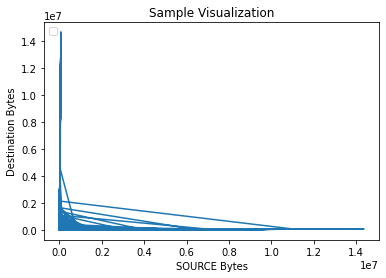

In [ ]:
# Make sbytes dbytes plot
x = UNSWNB15.select("sbytes").rdd.flatMap(list).collect()
y = UNSWNB15.select("dbytes").rdd.flatMap(list).collect()
# Title, Label axes, set margin, and show plot
plt.title("Sample Visualization")
plt.xlabel('SOURCE Bytes')
plt.ylabel('Destination Bytes')
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.show()

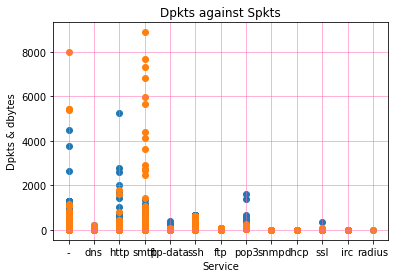

In [ ]:
# Make Service Dpkts plot
#rng = np.random.RandomState(0)
Service = UNSWNB15.select("service").rdd.flatMap(list).collect()
Dpkts = UNSWNB15.select("Dpkts").rdd.flatMap(list).collect()
Spkts = UNSWNB15.select("Spkts").rdd.flatMap(list).collect()
# Title, Label axes, set margin, and show plot
plt.title("Dpkts against Spkts")
plt.xlabel('Service')
plt.ylabel('Dpkts & dbytes')

# Plot the data with Matplotlib defaults
import matplotlib as mpl 
#plt.plot(x, y) 
plt.scatter(Service[::10], Dpkts[::10])
plt.grid(color = 'hotpink', linewidth = 0.5)
plt.scatter(Service[::10], Spkts[::10])
plt.show()